Thomas Dougherty

Probability and Statistics for Computer Science


Introduction

    To Do:

    Figure out script to iterate through and cleanup all CSVs

    Store data from all CSVs

    Aggregate data from *all* CSVs into one dataframe
    

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from helper_functions import *

#read CSV for March 2018
services = pd.read_csv('data\\2018_03.csv')
#status column is not needed so that will be dropped
services.drop(labels=['status'], axis=1, inplace=True)
# Amtrak rows are dropped because OTP of Amtrak was not tracked in the dataset
services.drop(services[services['type'] == 'Amtrak'].index, inplace=True)
services.astype({'date' : 'datetime64',
                'train_id' : 'category',
                'stop_sequence' : 'float16',
                'from' : 'category',
                'from_id': 'category',
                'to' : 'category',
                'to_id': 'category',
                'scheduled_time' : 'datetime64',
                'actual_time' : 'datetime64',
                'delay_minutes' : 'float16',
                'line' : 'category',
                'type' : 'category'})
                
# create new dataframe with data broken down by line
njt_lines=services['line'].unique()
max_delays = pd.Series(helper.get_max_delay(services,njt_lines)).round(3)
avg_delays = pd.Series(helper.get_avg_delay(services,njt_lines)).round(3)

performance_by_line = pd.DataFrame({'Longest Delay (minutes)': max_delays.values,
                                   'Average Delay (minutes)': avg_delays.values},
                                    index=njt_lines)

performance_by_line.astype({'Longest Delay (minutes)' :'float16',
                            'Average Delay (minutes)' :'float16'})

print(max_delays)
performance_by_line.dtypes
performance_by_line

0      91.083
1     100.267
2      86.000
3     100.283
4      99.083
5      94.000
6      79.000
7     100.217
8     111.183
9       4.467
10     75.017
dtype: float64


,Longest Delay (minutes),Average Delay (minutes)
Northeast Corrdr,91.083,4.253
No Jersey Coast,100.267,3.932
Main Line,86.000,3.542
Morristown Line,100.283,3.780
Gladstone Branch,99.083,3.654
Raritan Valley,94.000,2.662
Bergen Co. Line,79.000,2.964
Atl. City Line,100.217,4.482
Montclair-Boonton,111.183,3.382
Princeton Shuttle,4.467,0.096


Visualization of On-Time Performance by Rail Line

    notes: Princeton Shuttle is outlier considering it's short trip distance

<AxesSubplot: >

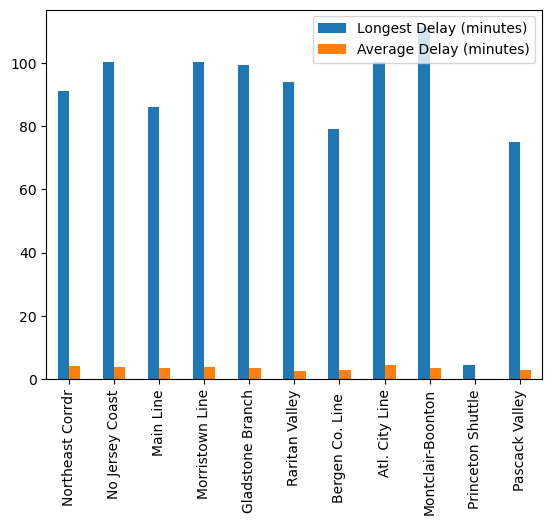

In [17]:
ax = performance_by_line.plot.bar()
ax